# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

# **Load the Data**

# Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from scipy import stats

# Load the Dataset

In [2]:
data = pd.read_excel('/content/Online Retail.xlsx')

# Discover the Data

Print the shape of the dataset

In [3]:
data.shape

(541909, 8)

Display the first few rows of the dataset

In [4]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

Display the last few rows of the dataset

In [5]:
data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

Display information about the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Display basic statistics of the dataset

In [7]:
data.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

Check for missing values in the dataset

In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Check for negative quantities in the dataset

In [9]:
negative = data['Quantity'] < 1
print("Number of negative quantities:", negative.sum())

Number of negative quantities: 10624


# Check for cancelled orders in the dataset

In [10]:
cancelled = data['InvoiceNo'].str.contains('C', na=False)
print("Number of cancelled orders:", cancelled.sum())

Number of cancelled orders: 9288


Calculate the number of unknown negative orders

In [11]:
Unknown_neg = negative.sum() - cancelled.sum()
print("Number of unknown negative orders:", Unknown_neg)

Number of unknown negative orders: 1336


Show Unique (Transction - Product - Customer - Country)

In [12]:
print("Number of transactions: ", data['InvoiceNo'].nunique())
print("Number of products: ",data['StockCode'].nunique())
print("Number of customers:", data['CustomerID'].nunique() )
print("Percentage of Null customers ID: ", round(data['CustomerID'].isnull().sum() * 100 / len(data), 2),"%")
print('Number of countries: ',data['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of Null customers ID:  24.93 %
Number of countries:  38


Calculate the number of Duplicated orders

In [13]:
data.duplicated(keep = False, subset = data.columns).sum()

10147

Calculate the percentage of cancelled orders

In [14]:
print("We have ", cancelled.sum(), " cancelled orders.")

#percentage of cancellations
total_orders = len(data)
print('Percentage of orders Cancelled: {}/{} ({:.2f}%) '.format(cancelled.sum(), total_orders, cancelled.sum()/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders Cancelled: 9288/541909 (1.71%) 


Calculate the percentage of unknown negative orders

In [15]:
print("We have ", Unknown_neg, " Unknown state orders.")

#percentage of Unknown state orders
print('Percentage of orders that have negative Quantity value but not cancelled: {}/{} ({:.2f}%) '.format(Unknown_neg, total_orders, Unknown_neg/total_orders*100))

We have  1336  Unknown state orders.
Percentage of orders that have negative Quantity value but not cancelled: 1336/541909 (0.25%) 


# **Clean & Validate the Data**

# Clean Duplicated and Missing Values

Drop fully duplicated rows while keeping the first occurrence

In [16]:
data = data.drop_duplicates(keep = 'first', subset = data.columns)

Drop rows where UnitPrice is less than or equal to 0

In [17]:
data = data[data['UnitPrice'] > 0]

Fill Empty 'CustomeID' Cells with Unknown Value

In [18]:
data['CustomerID'].fillna("Unknown", inplace=True)

# Create State Column

Create the 'State' column based on the specified conditions

In [19]:
# Add a new column "State" to the DataFrame initialized with an empty string
data['State'] = ""

# Create a mask to identify potential returns (negative quantity)
returns_mask = data['Quantity'] < 0

# Create a temporary column to facilitate matching (optional)
data['AbsQuantity'] = data['Quantity'].abs()

# Reset index to preserve the original indices
data = data.reset_index().rename(columns={'index': 'OriginalIndex'})

# Initialize valid_pairs as an empty DataFrame
valid_pairs = pd.DataFrame()

# Merge the DataFrame with itself to find matching orders and returns
merged = data.merge(data, on=['StockCode', 'UnitPrice', 'CustomerID', 'AbsQuantity'], suffixes=('_order', '_return'))

# Filter the merged DataFrame to include only valid pairs (order-quantity positive and return-quantity negative)
valid_pairs = merged[(merged['Quantity_order'] > 0) & (merged['Quantity_return'] < 0)]

# Reset index of valid_pairs
valid_pairs.reset_index(drop=True, inplace=True)

Update the State column for orders and returns

In [20]:
data.loc[data['OriginalIndex'].isin(valid_pairs['OriginalIndex_order']), 'State'] = "Processed"
data.loc[data['OriginalIndex'].isin(valid_pairs['OriginalIndex_return']), 'State'] = "Returned"

# Mark the remaining positive Quantity orders as "Completed"
data.loc[(data['Quantity'] > 0) & (data['State'] == ""), 'State'] = "Completed"

# Remove the temporary column and reset the index back to original
data.drop(columns=['AbsQuantity'], inplace=True)
data.set_index('OriginalIndex', inplace=True)

data.rename_axis('ID', inplace=True)

Fill blank values in 'State' column based on StockCode values

In [21]:
# Define a mapping dictionary for StockCode values
mapping = {
    'D': 'Other Expenses',
    'S': 'Other Expenses',
    'AMAZONFEE': 'Other Expenses',
    'BANK CHARGES': 'Other Expenses',
    'CRUK': 'Other Expenses',
    'M': 'Other Expenses',
    'POST': 'Other Expenses'
}

data.loc[data['State'].str.strip() == '', 'State'] = data.apply(lambda row: mapping.get(row['StockCode'], 'Returned') if str(row['State']).strip() == '' else row['State'], axis=1)

# Create 'Gross" Column

Calculate the gross amount for each transaction (Quantity * UnitPrice)

In [22]:
data = data.assign(Gross = data['Quantity'] * data['UnitPrice'])

# **Prepare Data to Visualization**

# Aggregating the data

In [23]:
# Calculate the count of completed orders and returned items
completed_count = (data['State'] == 'Completed').sum()
returned_count = (data['State'] == 'Returned').sum()

# Adding a column for Month-Year
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')
# Adding a column for Day of the Week
data['Weekday'] = data['InvoiceDate'].dt.day_name()
#Adding a column for Hour of the Day
data['HourDay'] = data['InvoiceDate'].dt.hour

# Filter out rows where CustomerID is "Unknown"
data_filtered = data[data['CustomerID'] != 'Unknown']

# Filter out rows where State is "Completed"
completed_orders = data[data['State'] == 'Completed']

# Group by Country and count the number of unique CustomerIDs
customers_by_country = data.groupby('Country')['CustomerID'].nunique().reset_index()

# Exclude customers from the United Kingdom
customers_by_country_excluding_uk = customers_by_country[customers_by_country['Country'] != 'United Kingdom']

# Group by Country and count the number of unique InvoiceNos
purchases_by_country = data.groupby('Country')['InvoiceNo'].nunique().reset_index()

# Exclude purchases from the United Kingdom
purchases_by_country_excluding_uk = purchases_by_country[purchases_by_country['Country'] != 'United Kingdom']

# Group by CustomerID and count the number of unique InvoiceNo for each customer
purchases_by_customer = data_filtered.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchases_by_customer.columns = ['CustomerID', 'TotalPurchases']

# Group by CustomerID and sum the gross revenue for each customer
gross_by_customer = data_filtered.groupby('CustomerID')['Gross'].sum().reset_index()
gross_by_customer.columns = ['CustomerID', 'TotalGross']

# Select the top 50 customers by total purchases
top_50_purchases = purchases_by_customer.sort_values(by='TotalPurchases', ascending=False).head(50)

# Select the top 50 customers by total gross revenue
top_50_gross = gross_by_customer.sort_values(by='TotalGross', ascending=False).head(50)

# Group by CustomerID and calculate total purchases and gross revenue
customer_stats = data_filtered.groupby('CustomerID').agg(TotalPurchases = ('InvoiceNo', 'nunique'), TotalGross = ('Gross', 'sum')).reset_index()

# Sort by TotalPurchases and select the top 50 customers
top_50_customers = customer_stats.sort_values(by='TotalPurchases', ascending=False).head(50)

# Group by Description and calculate total purchases and gross revenue for completed orders
purchases_by_category = completed_orders.groupby('Description').agg(TotalPurchases=('InvoiceNo', 'nunique'), TotalGross=('Gross', 'sum')).reset_index()

# Group by Description and calculate total purchases and gross revenue for all orders
purchases_by_category_g = data.groupby('Description').agg(TotalPurchases=('InvoiceNo', 'nunique'), TotalGross=('Gross', 'sum')).reset_index()

# Select the top 20 categories by total gross revenue
top_categories = purchases_by_category_g.sort_values(by='TotalGross', ascending=False).head(20)

# Group by Quantity and count the number of unique InvoiceNos
purchases_by_quantity = completed_orders.groupby('Quantity')['InvoiceNo'].nunique().reset_index()

# Group by MonthYear and count the number of unique InvoiceNos
purchases_by_date = data.groupby('MonthYear')['InvoiceNo'].nunique().reset_index()
purchases_by_date['MonthYear'] = purchases_by_date['MonthYear'].astype(str)

# Group by MonthYear and sum the gross revenue
gross_by_month = data.groupby('MonthYear')['Gross'].sum().reset_index()
gross_by_month['MonthYear'] = gross_by_month['MonthYear'].astype(str)

# Group by Country and MonthYear and count the number of unique InvoiceNos
purchases_by_country_date = data.groupby(['Country', 'MonthYear'])['InvoiceNo'].nunique().reset_index()
purchases_by_country_date['MonthYear'] = purchases_by_country_date['MonthYear'].astype(str)

# Group by Weekday and count the number of unique InvoiceNos
purchases_by_weekday = data.groupby('Weekday')['InvoiceNo'].nunique().reset_index()

# Group by Weekday and sum the gross revenue
gross_by_weekday = data.groupby('Weekday')['Gross'].sum().reset_index()
gross_by_weekday['Weekday'] = gross_by_weekday['Weekday'].astype(str)

# Group by hour and calculate total gross revenue
gross_by_hour = data.groupby('HourDay')['Gross'].sum().reset_index()

# Print Value of Aggregated Data into Tables

Define a function to create text tables

In [24]:
def create_text_table(dataframe, title):
    text_table = tabulate(dataframe, headers='keys', tablefmt='fancy_grid')
    text_table = f"\n{title}\n{text_table}\n"  # Add title to the table
    return text_table

Create a text table for the count of unique customers by country

In [25]:
customers_by_country_table = create_text_table(customers_by_country, "Customers by Country")
print(customers_by_country_table)


Customers by Country
╒════╤══════════════════════╤══════════════╕
│    │ Country              │   CustomerID │
╞════╪══════════════════════╪══════════════╡
│  0 │ Australia            │            9 │
├────┼──────────────────────┼──────────────┤
│  1 │ Austria              │           11 │
├────┼──────────────────────┼──────────────┤
│  2 │ Bahrain              │            3 │
├────┼──────────────────────┼──────────────┤
│  3 │ Belgium              │           25 │
├────┼──────────────────────┼──────────────┤
│  4 │ Brazil               │            1 │
├────┼──────────────────────┼──────────────┤
│  5 │ Canada               │            4 │
├────┼──────────────────────┼──────────────┤
│  6 │ Channel Islands      │            9 │
├────┼──────────────────────┼──────────────┤
│  7 │ Cyprus               │            8 │
├────┼──────────────────────┼──────────────┤
│  8 │ Czech Republic       │            1 │
├────┼──────────────────────┼──────────────┤
│  9 │ Denmark              │    

Create a text table for the count of unique purchases by country

In [26]:
purchases_by_country_table = create_text_table(purchases_by_country, "Purchases by Country")
print(purchases_by_country_table)


Purchases by Country
╒════╤══════════════════════╤═════════════╕
│    │ Country              │   InvoiceNo │
╞════╪══════════════════════╪═════════════╡
│  0 │ Australia            │          69 │
├────┼──────────────────────┼─────────────┤
│  1 │ Austria              │          19 │
├────┼──────────────────────┼─────────────┤
│  2 │ Bahrain              │           4 │
├────┼──────────────────────┼─────────────┤
│  3 │ Belgium              │         119 │
├────┼──────────────────────┼─────────────┤
│  4 │ Brazil               │           1 │
├────┼──────────────────────┼─────────────┤
│  5 │ Canada               │           6 │
├────┼──────────────────────┼─────────────┤
│  6 │ Channel Islands      │          33 │
├────┼──────────────────────┼─────────────┤
│  7 │ Cyprus               │          20 │
├────┼──────────────────────┼─────────────┤
│  8 │ Czech Republic       │           5 │
├────┼──────────────────────┼─────────────┤
│  9 │ Denmark              │          21 │
├────┼────

Create a text table for the count of unique purchases by customer

In [27]:
purchases_by_customer_table = create_text_table(purchases_by_customer, "Purchases by Customer")
print(purchases_by_customer_table)


Purchases by Customer
╒══════╤══════════════╤══════════════════╕
│      │   CustomerID │   TotalPurchases │
╞══════╪══════════════╪══════════════════╡
│    0 │        12346 │                2 │
├──────┼──────────────┼──────────────────┤
│    1 │        12347 │                7 │
├──────┼──────────────┼──────────────────┤
│    2 │        12348 │                4 │
├──────┼──────────────┼──────────────────┤
│    3 │        12349 │                1 │
├──────┼──────────────┼──────────────────┤
│    4 │        12350 │                1 │
├──────┼──────────────┼──────────────────┤
│    5 │        12352 │               11 │
├──────┼──────────────┼──────────────────┤
│    6 │        12353 │                1 │
├──────┼──────────────┼──────────────────┤
│    7 │        12354 │                1 │
├──────┼──────────────┼──────────────────┤
│    8 │        12355 │                1 │
├──────┼──────────────┼──────────────────┤
│    9 │        12356 │                3 │
├──────┼──────────────┼────────

Create a text table for the total gross revenue by customer

In [28]:
gross_by_customer_table = create_text_table(gross_by_customer, "Gross by Customer")
print(gross_by_customer_table)


Gross by Customer
╒══════╤══════════════╤══════════════════╕
│      │   CustomerID │       TotalGross │
╞══════╪══════════════╪══════════════════╡
│    0 │        12346 │      0           │
├──────┼──────────────┼──────────────────┤
│    1 │        12347 │   4310           │
├──────┼──────────────┼──────────────────┤
│    2 │        12348 │   1797.24        │
├──────┼──────────────┼──────────────────┤
│    3 │        12349 │   1757.55        │
├──────┼──────────────┼──────────────────┤
│    4 │        12350 │    334.4         │
├──────┼──────────────┼──────────────────┤
│    5 │        12352 │   1545.41        │
├──────┼──────────────┼──────────────────┤
│    6 │        12353 │     89           │
├──────┼──────────────┼──────────────────┤
│    7 │        12354 │   1079.4         │
├──────┼──────────────┼──────────────────┤
│    8 │        12355 │    459.4         │
├──────┼──────────────┼──────────────────┤
│    9 │        12356 │   2811.43        │
├──────┼──────────────┼────────────

Create a text table for the count of unique purchases by category

In [29]:
purchases_by_category_table = create_text_table(purchases_by_category, "Purchases by Category")
print(purchases_by_category_table)


Purchases by Category
╒══════╤═════════════════════════════════════╤══════════════════╤══════════════╕
│      │ Description                         │   TotalPurchases │   TotalGross │
╞══════╪═════════════════════════════════════╪══════════════════╪══════════════╡
│    0 │ 4 PURPLE FLOCK DINNER CANDLES       │               38 │      285.7   │
├──────┼─────────────────────────────────────┼──────────────────┼──────────────┤
│    1 │ 50'S CHRISTMAS GIFT BAG LARGE       │              129 │     2343.63  │
├──────┼─────────────────────────────────────┼──────────────────┼──────────────┤
│    2 │ DOLLY GIRL BEAKER                   │              174 │     2886.25  │
├──────┼─────────────────────────────────────┼──────────────────┼──────────────┤
│    3 │ I LOVE LONDON MINI BACKPACK         │               86 │     1624.02  │
├──────┼─────────────────────────────────────┼──────────────────┼──────────────┤
│    4 │ I LOVE LONDON MINI RUCKSACK         │                1 │        4.15  │
├────

Create a text table for the count of unique purchases by quantity

In [30]:
purchases_by_quantity_table = create_text_table(purchases_by_quantity, "Purchases by Quantity")
print(purchases_by_quantity_table)


Purchases by Quantity
╒═════╤════════════╤═════════════╕
│     │   Quantity │   InvoiceNo │
╞═════╪════════════╪═════════════╡
│   0 │          1 │        8147 │
├─────┼────────────┼─────────────┤
│   1 │          2 │       10684 │
├─────┼────────────┼─────────────┤
│   2 │          3 │        8606 │
├─────┼────────────┼─────────────┤
│   3 │          4 │       10654 │
├─────┼────────────┼─────────────┤
│   4 │          5 │        4157 │
├─────┼────────────┼─────────────┤
│   5 │          6 │       11503 │
├─────┼────────────┼─────────────┤
│   6 │          7 │        1377 │
├─────┼────────────┼─────────────┤
│   7 │          8 │        6329 │
├─────┼────────────┼─────────────┤
│   8 │          9 │        1292 │
├─────┼────────────┼─────────────┤
│   9 │         10 │        6758 │
├─────┼────────────┼─────────────┤
│  10 │         11 │         587 │
├─────┼────────────┼─────────────┤
│  11 │         12 │       12333 │
├─────┼────────────┼─────────────┤
│  12 │         13 │         377

Create a text table for the count of unique purchases by date

In [31]:
purchases_by_date_table = create_text_table(purchases_by_date, "Purchases by Date")
print(purchases_by_date_table)


Purchases by Date
╒════╤═════════════╤═════════════╕
│    │ MonthYear   │   InvoiceNo │
╞════╪═════════════╪═════════════╡
│  0 │ 2010-12     │        1885 │
├────┼─────────────┼─────────────┤
│  1 │ 2011-01     │        1346 │
├────┼─────────────┼─────────────┤
│  2 │ 2011-02     │        1319 │
├────┼─────────────┼─────────────┤
│  3 │ 2011-03     │        1772 │
├────┼─────────────┼─────────────┤
│  4 │ 2011-04     │        1486 │
├────┼─────────────┼─────────────┤
│  5 │ 2011-05     │        1995 │
├────┼─────────────┼─────────────┤
│  6 │ 2011-06     │        1862 │
├────┼─────────────┼─────────────┤
│  7 │ 2011-07     │        1745 │
├────┼─────────────┼─────────────┤
│  8 │ 2011-08     │        1639 │
├────┼─────────────┼─────────────┤
│  9 │ 2011-09     │        2170 │
├────┼─────────────┼─────────────┤
│ 10 │ 2011-10     │        2402 │
├────┼─────────────┼─────────────┤
│ 11 │ 2011-11     │        3210 │
├────┼─────────────┼─────────────┤
│ 12 │ 2011-12     │         965 │
╘

Create a text table for the total gross revenue by month

In [32]:
gross_by_month_table = create_text_table(gross_by_month, "Gross by Month")
print(gross_by_month_table)


Gross by Month
╒════╤═════════════╤══════════════════╕
│    │ MonthYear   │            Gross │
╞════╪═════════════╪══════════════════╡
│  0 │ 2010-12     │ 746724           │
├────┼─────────────┼──────────────────┤
│  1 │ 2011-01     │ 558449           │
├────┼─────────────┼──────────────────┤
│  2 │ 2011-02     │ 497026           │
├────┼─────────────┼──────────────────┤
│  3 │ 2011-03     │ 682014           │
├────┼─────────────┼──────────────────┤
│  4 │ 2011-04     │ 492368           │
├────┼─────────────┼──────────────────┤
│  5 │ 2011-05     │ 722094           │
├────┼─────────────┼──────────────────┤
│  6 │ 2011-06     │ 689977           │
├────┼─────────────┼──────────────────┤
│  7 │ 2011-07     │ 680157           │
├────┼─────────────┼──────────────────┤
│  8 │ 2011-08     │ 703511           │
├────┼─────────────┼──────────────────┤
│  9 │ 2011-09     │      1.0176e+06  │
├────┼─────────────┼──────────────────┤
│ 10 │ 2011-10     │      1.06937e+06 │
├────┼─────────────┼────

Create a text table for the count of unique purchases by weekday

In [33]:
purchases_by_weekday_table = create_text_table(purchases_by_weekday, "Purchases by Weekday")
print(purchases_by_weekday_table)


Purchases by Weekday
╒════╤═══════════╤═════════════╕
│    │ Weekday   │   InvoiceNo │
╞════╪═══════════╪═════════════╡
│  0 │ Friday    │        3691 │
├────┼───────────┼─────────────┤
│  1 │ Monday    │        3844 │
├────┼───────────┼─────────────┤
│  2 │ Sunday    │        2378 │
├────┼───────────┼─────────────┤
│  3 │ Thursday  │        5217 │
├────┼───────────┼─────────────┤
│  4 │ Tuesday   │        4303 │
├────┼───────────┼─────────────┤
│  5 │ Wednesday │        4363 │
╘════╧═══════════╧═════════════╛



Create a text table for the total gross revenue by weekday

In [34]:
gross_by_weekday_table = create_text_table(gross_by_weekday, "Gross by Weekday")
print(gross_by_weekday_table)


Gross by Weekday
╒════╤═══════════╤══════════════════╕
│    │ Weekday   │            Gross │
╞════╪═══════════╪══════════════════╡
│  0 │ Friday    │      1.56008e+06 │
├────┼───────────┼──────────────────┤
│  1 │ Monday    │      1.5849e+06  │
├────┼───────────┼──────────────────┤
│  2 │ Sunday    │ 798659           │
├────┼───────────┼──────────────────┤
│  3 │ Thursday  │      2.1087e+06  │
├────┼───────────┼──────────────────┤
│  4 │ Tuesday   │      1.9657e+06  │
├────┼───────────┼──────────────────┤
│  5 │ Wednesday │      1.73009e+06 │
╘════╧═══════════╧══════════════════╛



Create a text table for the total gross revenue by hour of the day

In [35]:
gross_by_hour_table = create_text_table(gross_by_hour, "Gross by Hour")
print(gross_by_hour_table)


Gross by Hour
╒════╤═══════════╤══════════════════╕
│    │   HourDay │            Gross │
╞════╪═══════════╪══════════════════╡
│  0 │         6 │   -497.35        │
├────┼───────────┼──────────────────┤
│  1 │         7 │  31009.3         │
├────┼───────────┼──────────────────┤
│  2 │         8 │ 281723           │
├────┼───────────┼──────────────────┤
│  3 │         9 │ 766524           │
├────┼───────────┼──────────────────┤
│  4 │        10 │      1.32733e+06 │
├────┼───────────┼──────────────────┤
│  5 │        11 │      1.14646e+06 │
├────┼───────────┼──────────────────┤
│  6 │        12 │      1.3576e+06  │
├────┼───────────┼──────────────────┤
│  7 │        13 │      1.17299e+06 │
├────┼───────────┼──────────────────┤
│  8 │        14 │      1.11353e+06 │
├────┼───────────┼──────────────────┤
│  9 │        15 │      1.18682e+06 │
├────┼───────────┼──────────────────┤
│ 10 │        16 │ 727667           │
├────┼───────────┼──────────────────┤
│ 11 │        17 │ 434835          

# **Visualization**

# Completed Orders to Returned Items

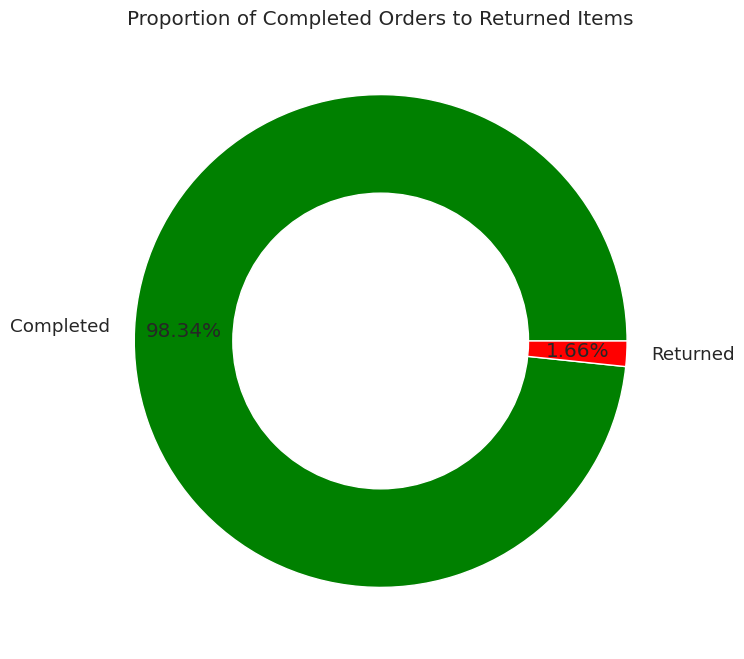

In [36]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

# Create labels for the pie chart
labels = ['Completed', 'Returned']

# Create data for the pie chart
sizes = [completed_count, returned_count]

plt.pie(
    x = sizes,
    labels = labels,
    colors= ['green', 'red'],
    autopct='%1.2f%%',
    pctdistance=0.80,
)

### Add a hole in the pie
hole = plt.Circle((0, 0), 0.60, facecolor='white')
plt.title('Proportion of Completed Orders to Returned Items')
plt.gcf().gca().add_artist(hole)
plt.show()

# Number of Customers by Country (Log Scale)

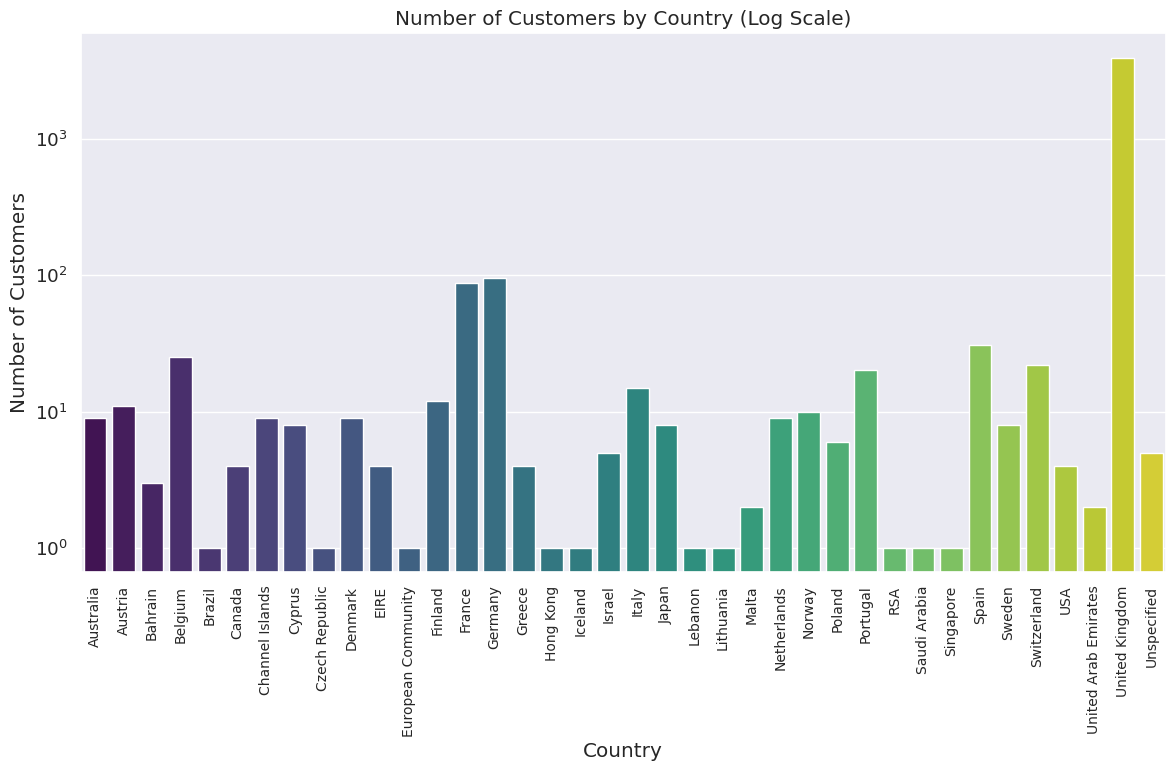

In [37]:
plt.figure(figsize = (14, 7))
sns.barplot(data = customers_by_country, x = 'Country', y = 'CustomerID', palette = 'viridis', hue = 'Country', dodge = False, legend = False)
plt.yscale('log')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Number of Customers by Country (Log Scale)')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

# Number of Customers by Country (Excluding UK)

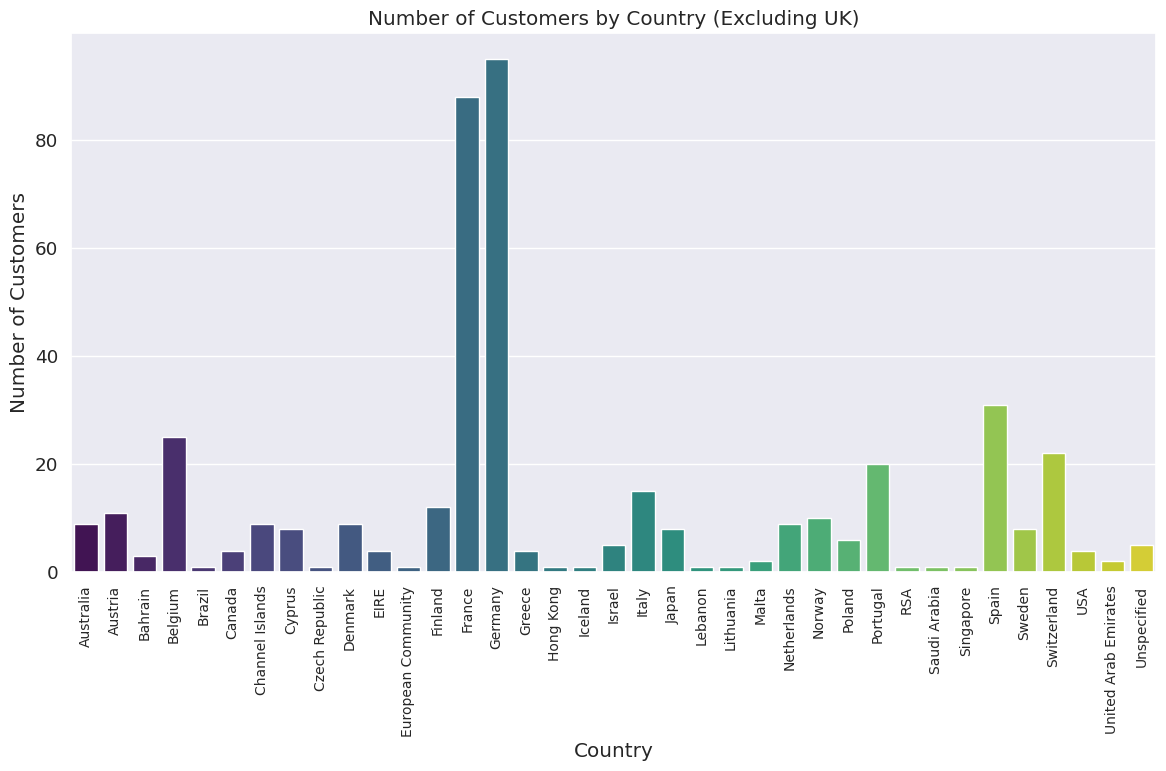

In [38]:
plt.figure(figsize = (14, 7))
sns.barplot(data = customers_by_country_excluding_uk, x = 'Country', y = 'CustomerID', palette = 'viridis', hue = 'Country', dodge = False, legend = False)
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Number of Customers by Country (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

# Number of Purchases by Country (Log Scale)

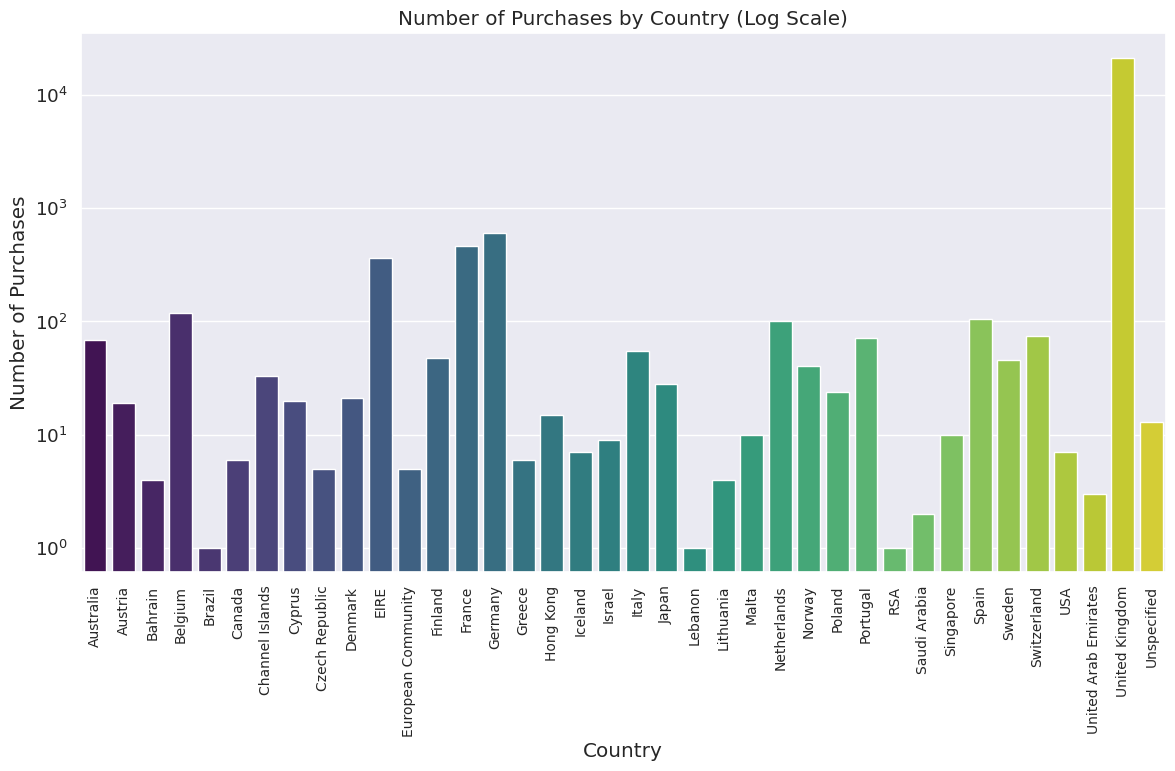

In [39]:
# Original plot with UK included (log scale for y-axis)
plt.figure(figsize = (14, 7))
sns.barplot(data = purchases_by_country, x = 'Country', y = 'InvoiceNo', palette = 'viridis', hue = 'Country', dodge = False, legend = False)
plt.yscale('log')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Number of Purchases by Country (Log Scale)')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.show()

# Number of Purchases by Country (Excluding UK)

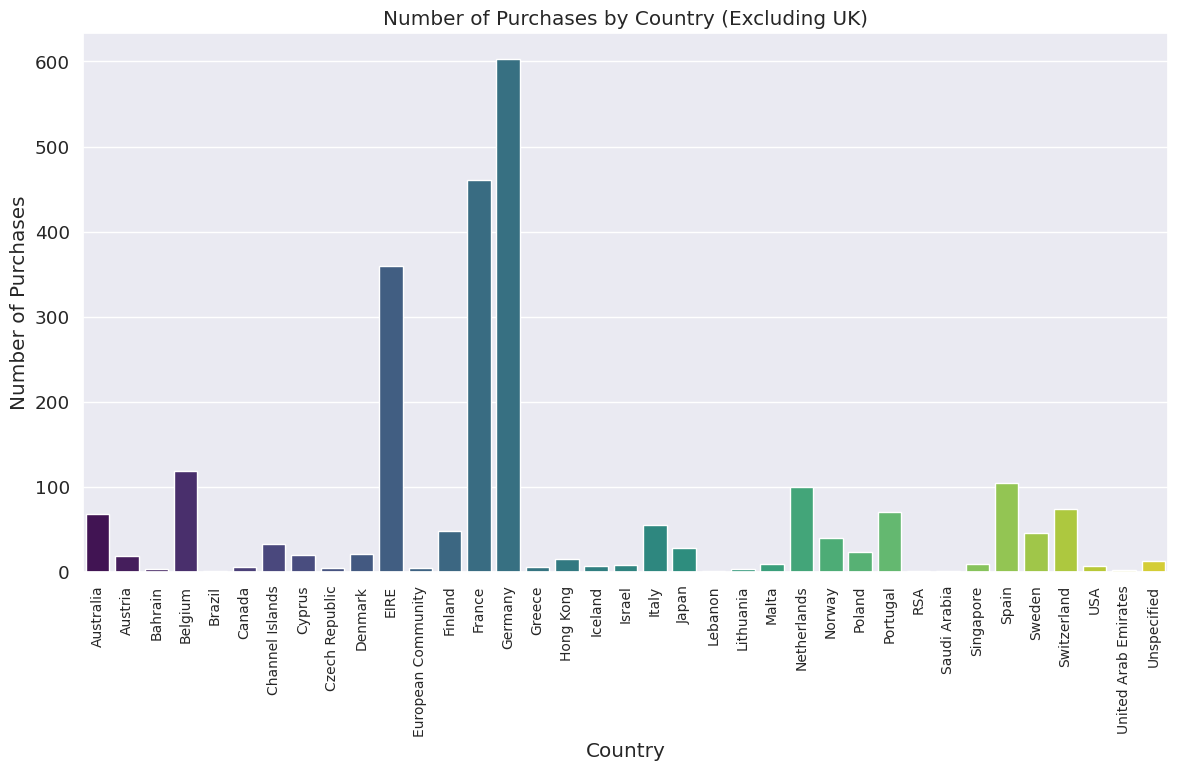

In [40]:
plt.figure(figsize = (14, 7))
sns.barplot(data = purchases_by_country_excluding_uk, x = 'Country', y = 'InvoiceNo', palette = 'viridis', hue = 'Country', dodge = False, legend = False)
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Number of Purchases by Country (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.show()

# Distribution of Purchases by Customer (Top 50)

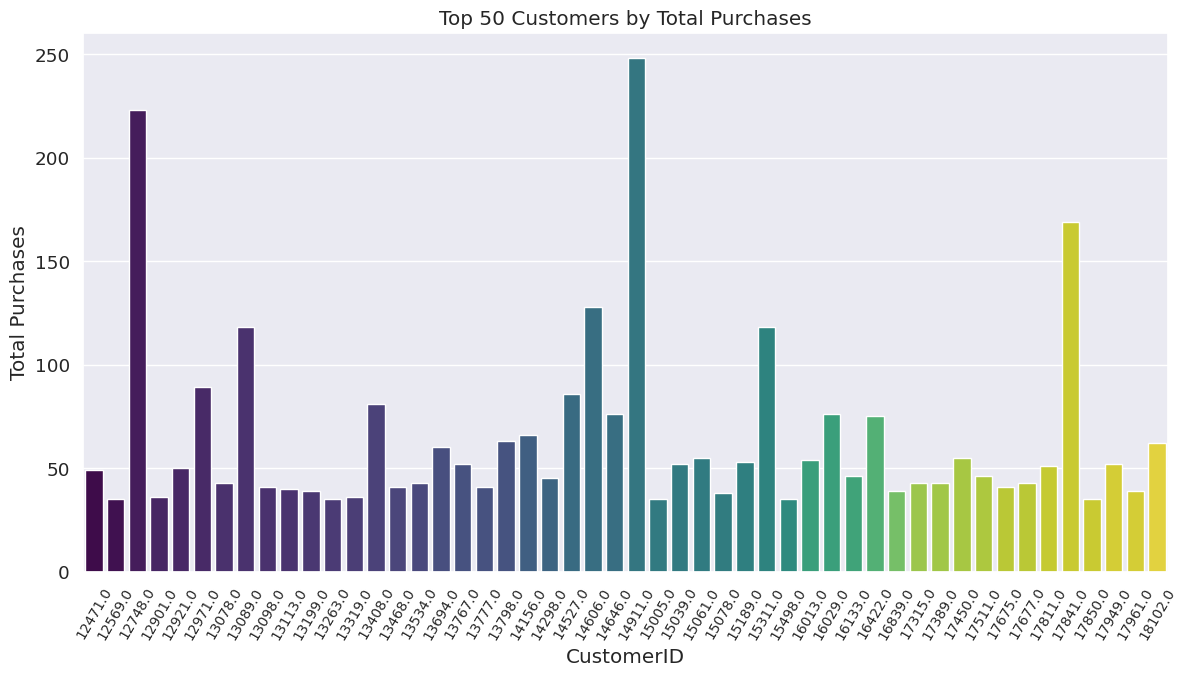

In [41]:
plt.figure(figsize = (14, 7))
sns.barplot(data = top_50_purchases, x = 'CustomerID', y = 'TotalPurchases', hue = 'CustomerID', palette = 'viridis', legend = False)
plt.xticks(rotation = 60, fontsize = 10)
plt.title('Top 50 Customers by Total Purchases')
plt.xlabel('CustomerID')
plt.ylabel('Total Purchases')
plt.show()

# Distribution of Gross by Customer (Top 50)

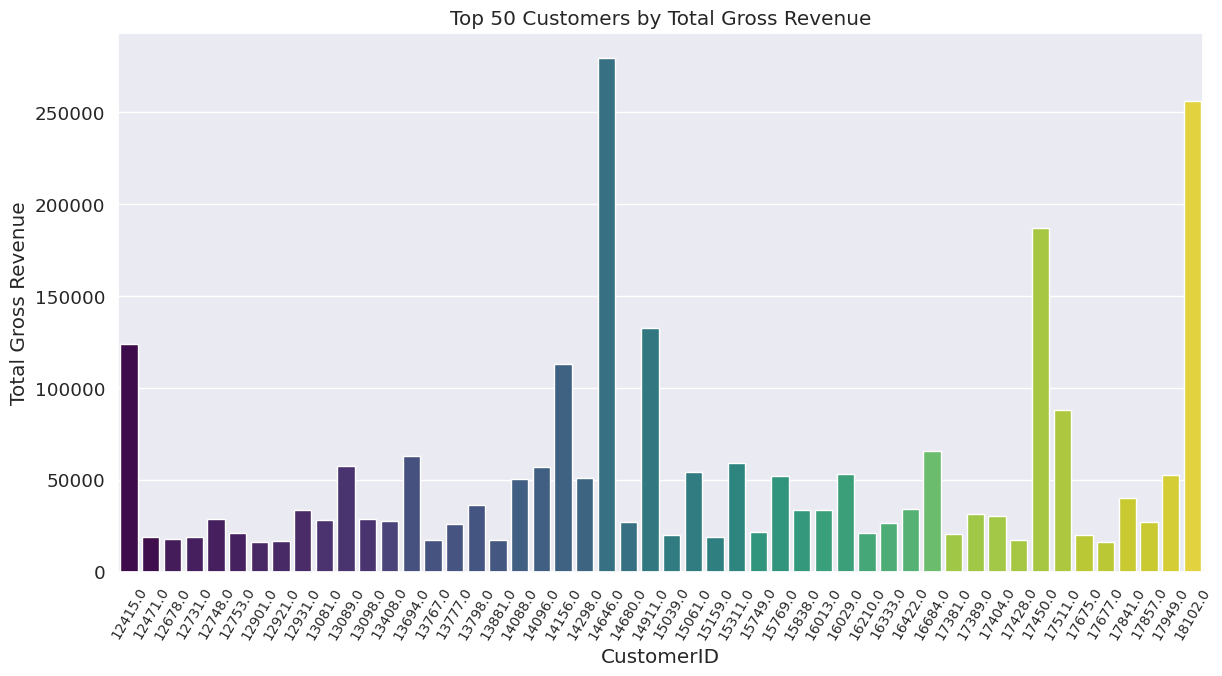

In [42]:
plt.figure(figsize=(14, 7))
sns.barplot(data = top_50_gross, x = 'CustomerID', y = 'TotalGross', hue = 'CustomerID', palette = 'viridis', legend = False)
plt.xticks(rotation = 60, fontsize = 10)
plt.title('Top 50 Customers by Total Gross Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Total Gross Revenue')
plt.show()

# Top 50 Customers by Gross Purchases

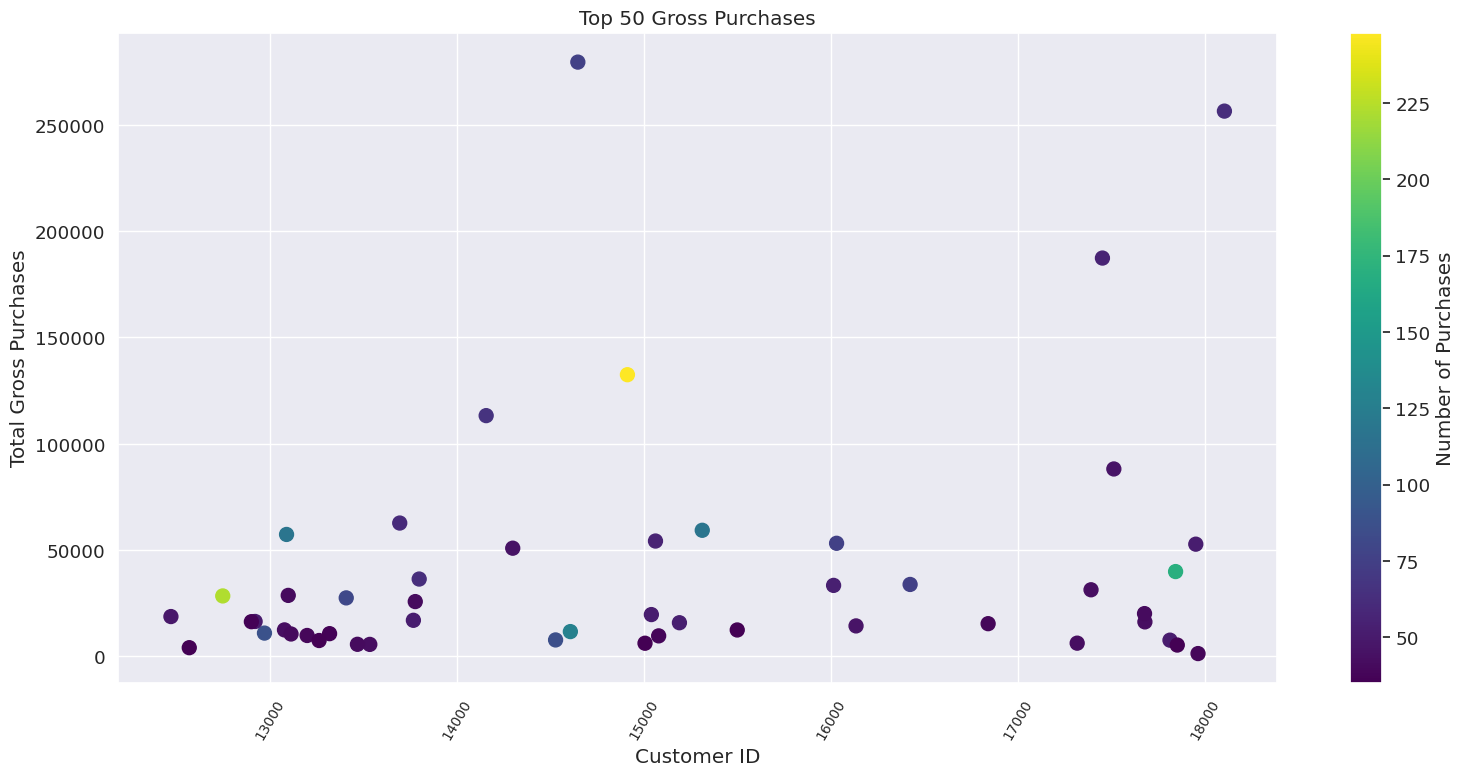

In [43]:
# Prepare data for scatter plot
customer_ids = top_50_customers['CustomerID']
num_purchases = top_50_customers['TotalPurchases']
gross_purchases = top_50_customers['TotalGross']

# Plot scatter plot
plt.figure(figsize=(16, 8))
scatter = plt.scatter(customer_ids, gross_purchases, c = num_purchases, cmap = 'viridis', s = 100)

# Add color bar
plt.colorbar(scatter, label='Number of Purchases')

# Set labels and title
plt.xlabel('Customer ID')
plt.ylabel('Total Gross Purchases')
plt.title('Top 50 Gross Purchases')

# Show Customer IDs on x-axis
plt.xticks(rotation = 60, fontsize = 10)

# Show plot
plt.tight_layout()
plt.show()

# Top 20 Purchased Categories by Number of Purchases

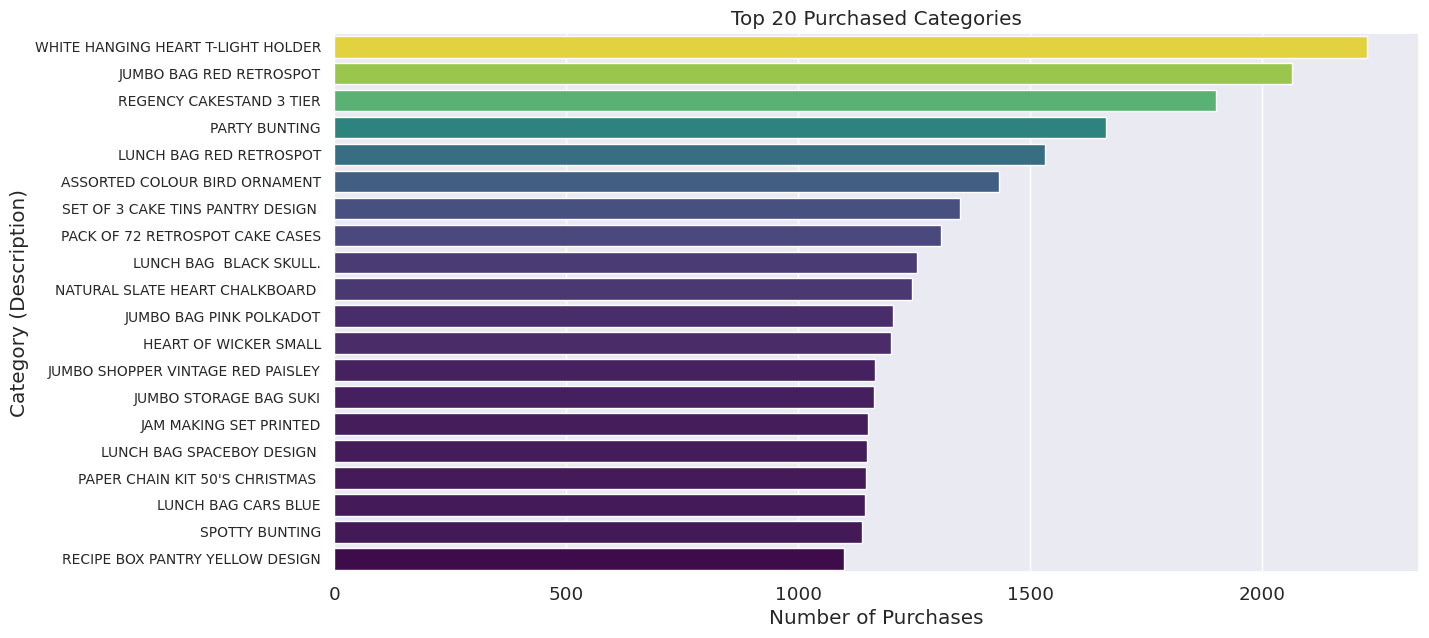

In [44]:
plt.figure(figsize=(14, 7))
top_categories = purchases_by_category.sort_values(by='TotalPurchases', ascending=False).head(20)
sns.barplot(data = top_categories, x = 'TotalPurchases', y = 'Description', palette = 'viridis', hue = 'TotalPurchases', legend = False)
plt.title('Top 20 Purchased Categories')
plt.xlabel('Number of Purchases')
plt.ylabel('Category (Description)')
plt.yticks(fontsize = 10)
plt.show()

# Top 20 Purchased Categories by Total Gross

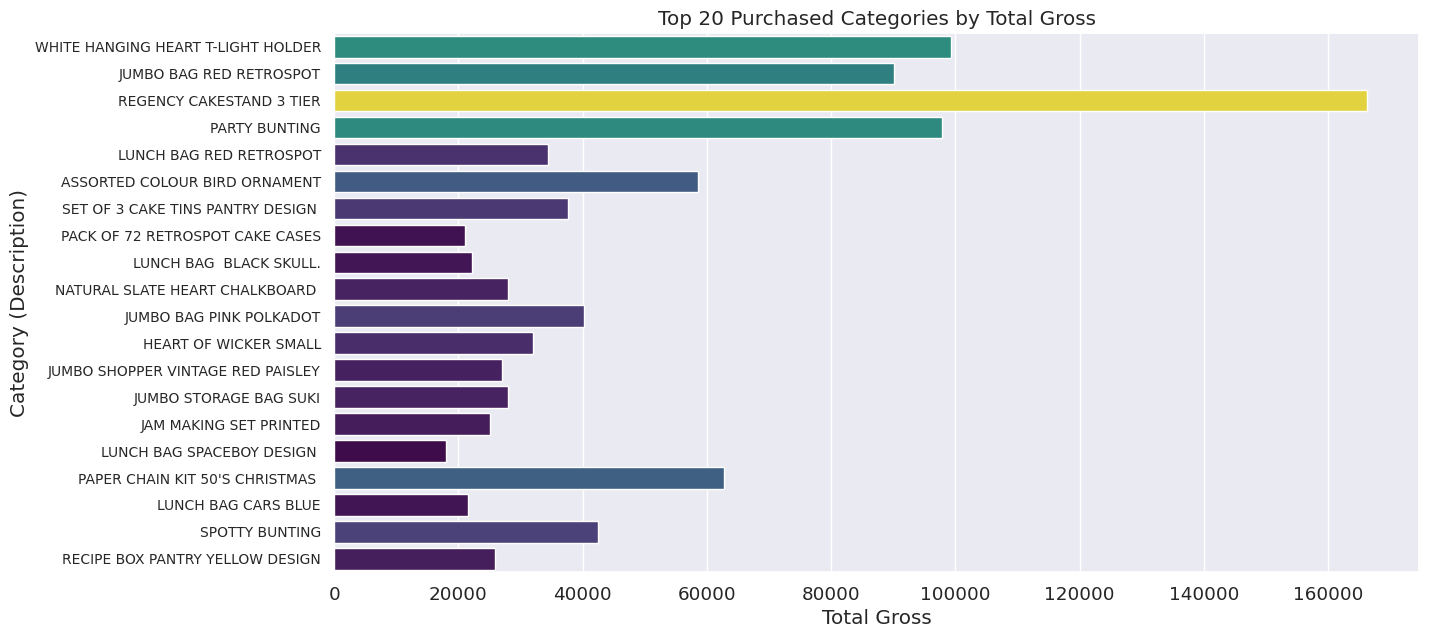

In [45]:
plt.figure(figsize=(14, 7))

# Plot the total gross for each category
sns.barplot(data = top_categories, x = 'TotalGross', y = 'Description', palette = 'viridis', hue = 'TotalGross', legend = False)

plt.title('Top 20 Purchased Categories by Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Category (Description)')
plt.yticks(fontsize = 10)
plt.show()

# Distribution of Purchases by Quantity

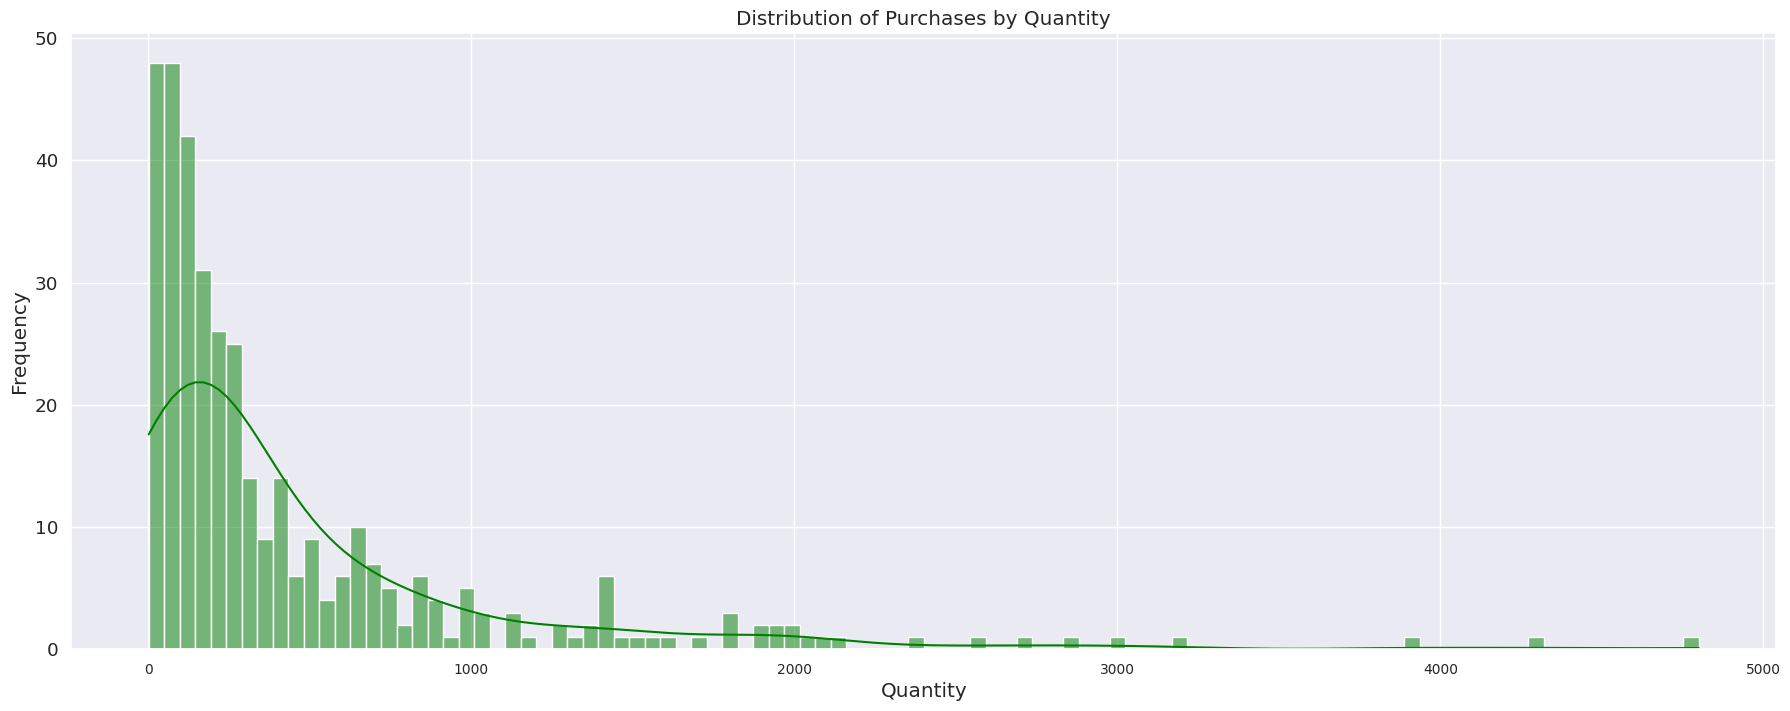

In [46]:
plt.figure(figsize=(22, 8))
sns.histplot(purchases_by_quantity['Quantity'], bins= 100, kde = True, color = 'green')
plt.title('Distribution of Purchases by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xticks(fontsize = 10)
plt.show()

# Monthly Purchases Number

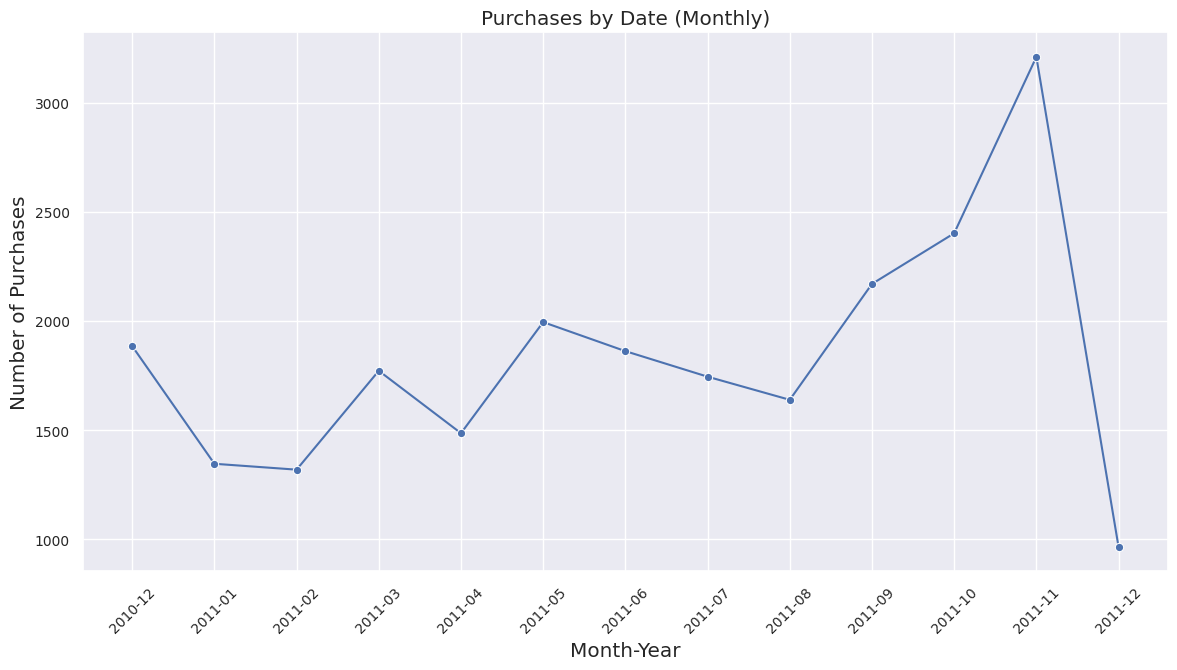

In [47]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = purchases_by_date, x = 'MonthYear', y = 'InvoiceNo', marker = 'o')
plt.title('Purchases by Date (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Purchases')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Monthly Gross

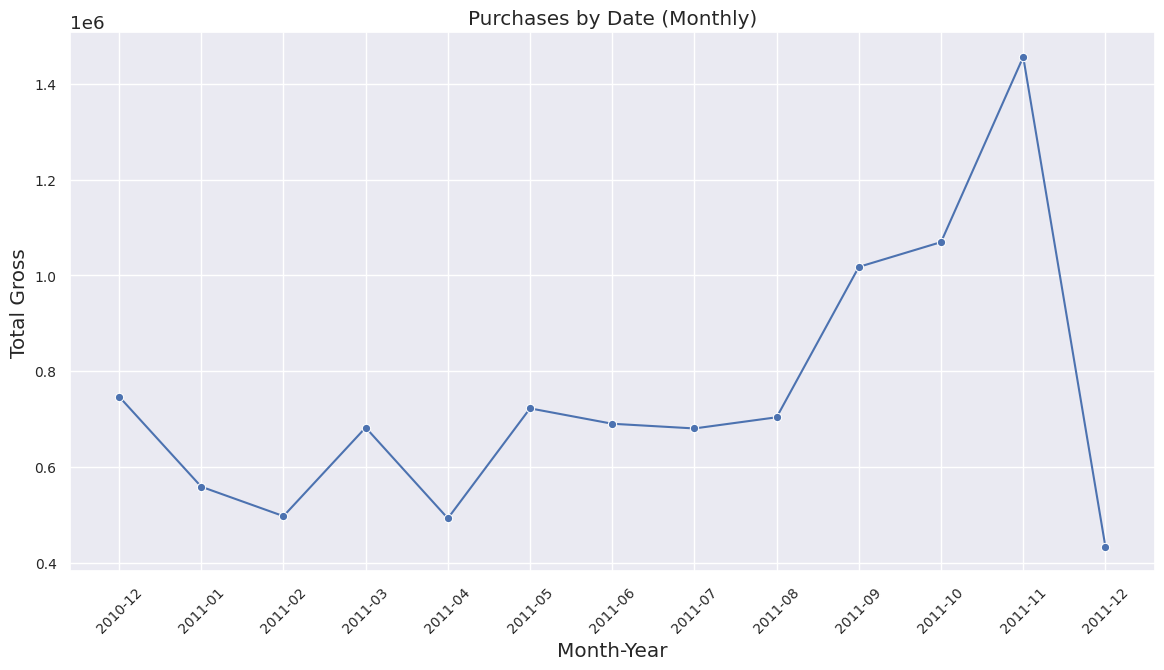

In [48]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = gross_by_month, x = 'MonthYear', y = 'Gross', marker = 'o')
plt.title('Purchases by Date (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Total Gross')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Monthly Orders and Gross Revenue

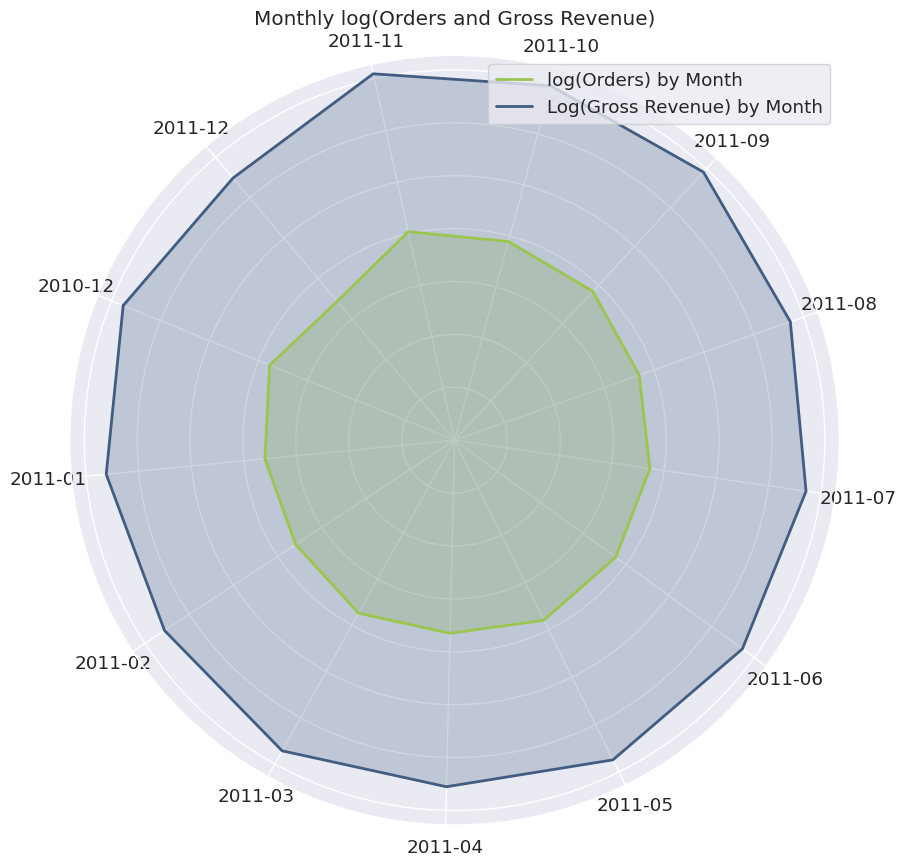

In [49]:
# Preparing data for radar chart
labels = purchases_by_date['MonthYear'].tolist()
num_vars = len(labels)

# Calculate angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circular graph, so we need to "complete the loop" by appending the first value to the end
labels += labels[:1]
angles += angles[:1]

# Data for orders by month
orders = purchases_by_date['InvoiceNo'].apply(np.log).tolist()
orders += orders[:1]

# Data for gross revenue by month with logarithmic transformation
gross = gross_by_month['Gross'].apply(np.log).tolist()  # using log1p to handle zero values
gross += gross[:1]

# Plotting the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw = dict (polar = True))

ax.fill(angles, orders, color='#9ac64d', alpha=0.25)
ax.plot(angles, orders, color='#9ac64d', linewidth=2, linestyle='solid', label='log(Orders) by Month')

ax.fill(angles, gross, color='#415d82', alpha=0.25)
ax.plot(angles, gross, color='#415d82', linewidth=2, linestyle='solid', label='Log(Gross Revenue) by Month')

# Adding labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels[:-1])  # Remove the last appended label

# Rotate the chart by 90 degrees
ax.set_theta_offset(np.pi / 1.14)

plt.title('Monthly log(Orders and Gross Revenue)')
plt.legend(loc='upper right')
plt.show()

# Purchases by Weekdays

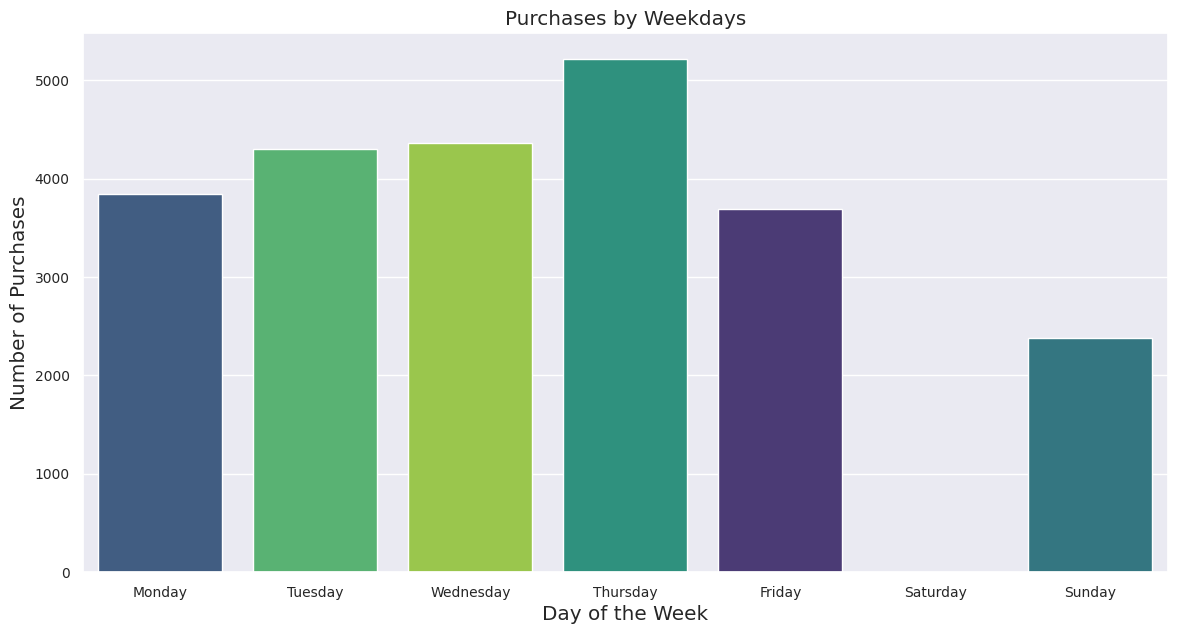

In [50]:
plt.figure(figsize=(14, 7))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = purchases_by_weekday, x = 'Weekday', y = 'InvoiceNo', order =order, palette = 'viridis', hue = 'Weekday')
plt.title('Purchases by Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Gross by Weekdays

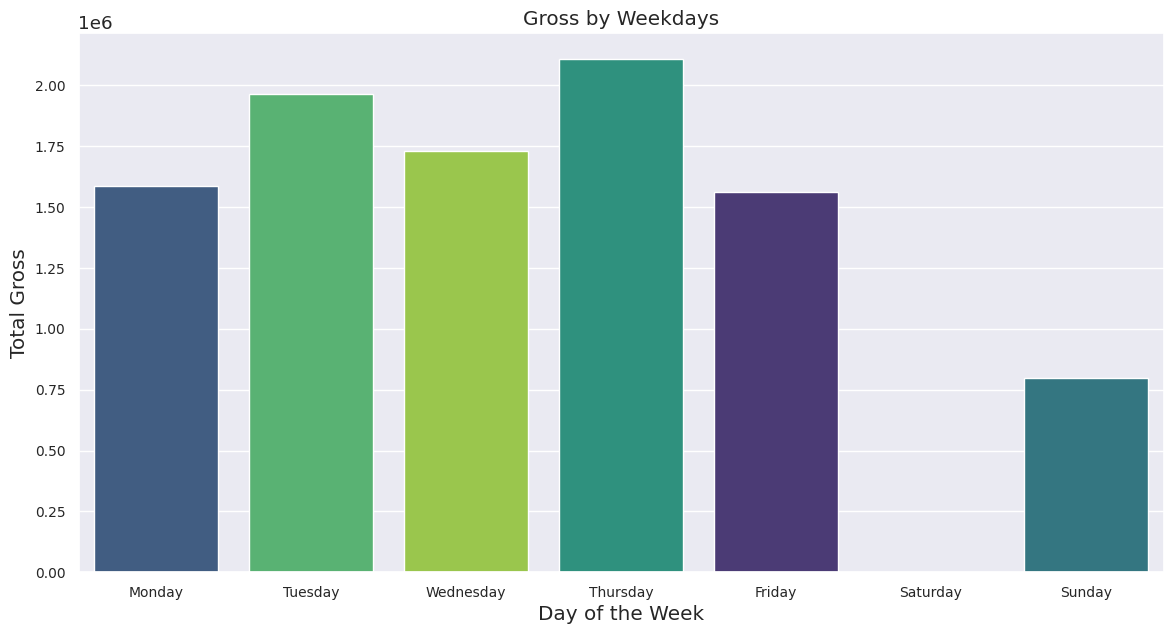

In [51]:
plt.figure(figsize=(14, 7))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = gross_by_weekday, x = 'Weekday', y = 'Gross', order =order, palette = 'viridis', hue = 'Weekday')
plt.title('Gross by Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Total Gross')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

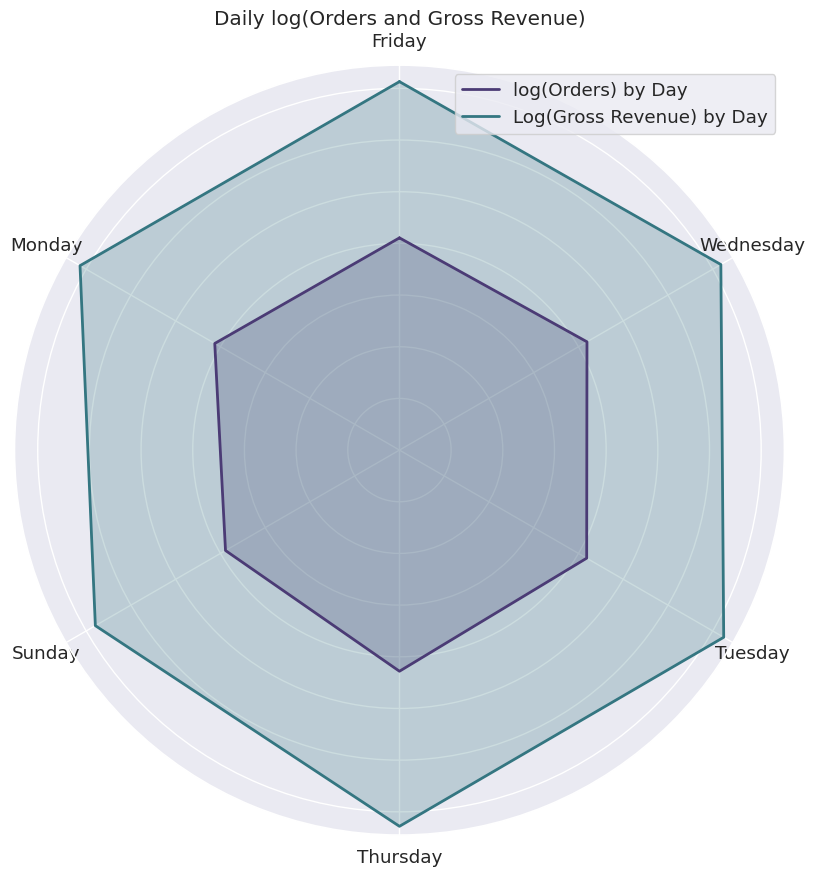

In [52]:
# Preparing data for radar chart
labels = gross_by_weekday['Weekday'].tolist()
num_vars = len(labels)

# Calculate angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circular graph, so we need to "complete the loop" by appending the first value to the end
labels += labels[:1]
angles += angles[:1]

# Data for orders by month
orders = purchases_by_weekday['InvoiceNo'].apply(np.log).tolist()
orders += orders[:1]

# Data for gross revenue by month with logarithmic transformation
gross = gross_by_weekday['Gross'].apply(np.log).tolist()  # using log1p to handle zero values
gross += gross[:1]

# Plotting the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw = dict (polar = True))

ax.fill(angles, orders, color='#4b3b75', alpha=0.25)
ax.plot(angles, orders, color='#4b3b75', linewidth=2, linestyle='solid', label='log(Orders) by Day')

ax.fill(angles, gross, color='#347681', alpha=0.25)
ax.plot(angles, gross, color='#347681', linewidth=2, linestyle='solid', label='Log(Gross Revenue) by Day')

# Adding labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels[:-1])  # Remove the last appended label

# Rotate the chart by 90 degrees
ax.set_theta_offset(np.pi / 2)

plt.title('Daily log(Orders and Gross Revenue)')
plt.legend(loc='upper right')
plt.show()

# Distribution of Purchases by Hour of the Day

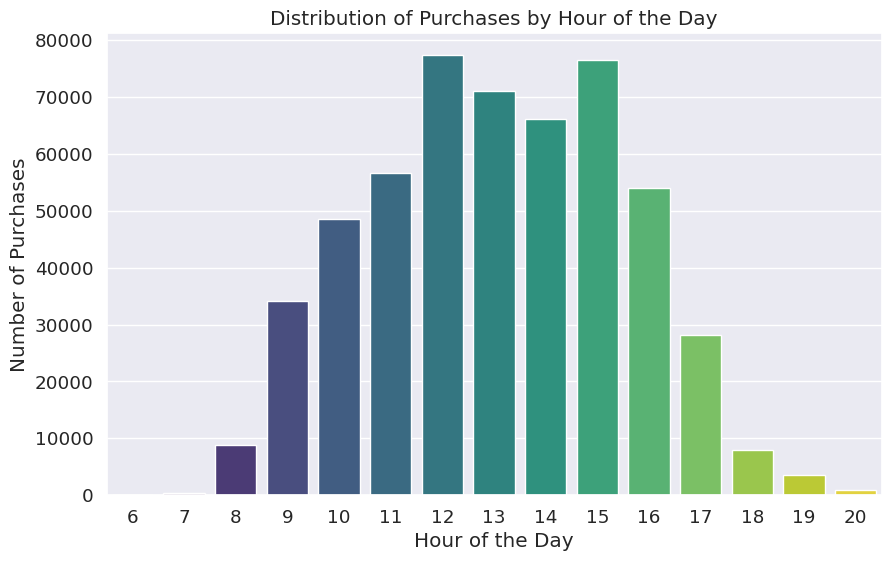

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='HourDay', palette='viridis', hue = "HourDay", legend = False)
plt.title('Distribution of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.show()

# Gross Revenue by Hour of the Day

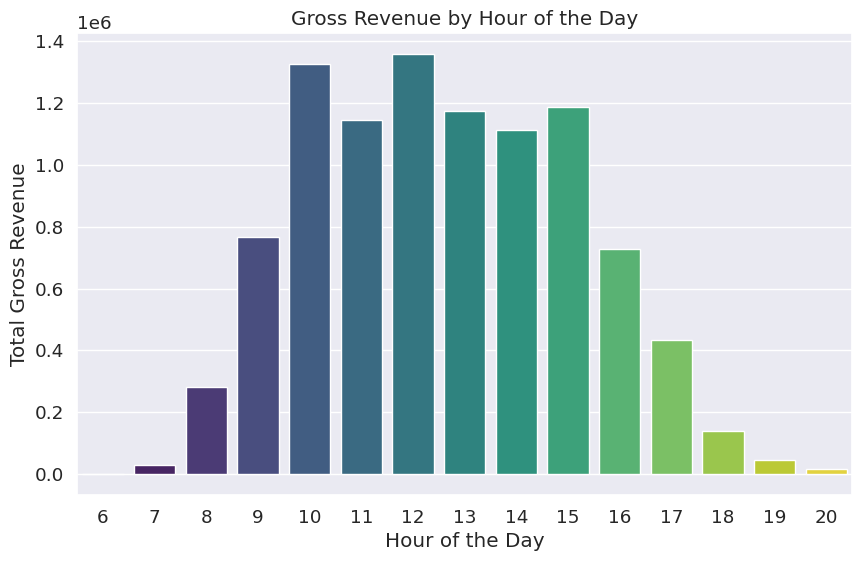

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gross_by_hour, x='HourDay', y='Gross', palette='viridis', hue = "HourDay", legend = False)
plt.title('Gross Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Gross Revenue')
plt.show()

# **outliers & anomalies in Dataset**

Statistical summary of data with outliers

In [55]:
summary_with_outliers = data.describe()
print(tabulate(summary_with_outliers))

-----  ------------  -----------------------------  ------------  ------------  ------------
count  534129        534129                         534129         534129       534129
mean        9.91682  2011-07-04 12:02:01.631403776       4.69586       18.2505      13.0753
min    -80995        2010-12-01 08:26:00                 0.001    -168470            6
25%         1        2011-03-28 11:36:00                 1.25           3.75        11
50%         3        2011-07-19 15:55:00                 2.1            9.9         13
75%        10        2011-10-18 17:10:00                 4.13          17.57        15
max     80995        2011-12-09 12:50:00             38970         168470           20
std       216.452    nan                                95.0792       380.945        2.44774
-----  ------------  -----------------------------  ------------  ------------  ------------


In [56]:
# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(data['Gross'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = data[outlier_mask]

without_outliers_online_retail = data[~outlier_mask]

# Statistical Summary of data without outliers
summary_without_outliers = without_outliers_online_retail.describe()

print(tabulate(summary_without_outliers))

-----  ------------  -----------------------------  ------------  -----------  ------------
count  533734        533734                         533734        533734       533734
mean        9.62345  2011-07-04 12:00:10.956693760       3.82101      17.6983      13.0754
min     -9360        2010-12-01 08:26:00                 0.001     -1121.18         6
25%         1        2011-03-28 11:34:00                 1.25          3.75        11
50%         3        2011-07-19 15:55:00                 2.1           9.9         13
75%        10        2011-10-18 17:10:00                 4.13         17.4         15
max      4800        2011-12-09 12:50:00              1154.67       1158           20
std        34.7637   nan                                15.4634       44.6981       2.44755
-----  ------------  -----------------------------  ------------  -----------  ------------


Statistical summary of data with outliers

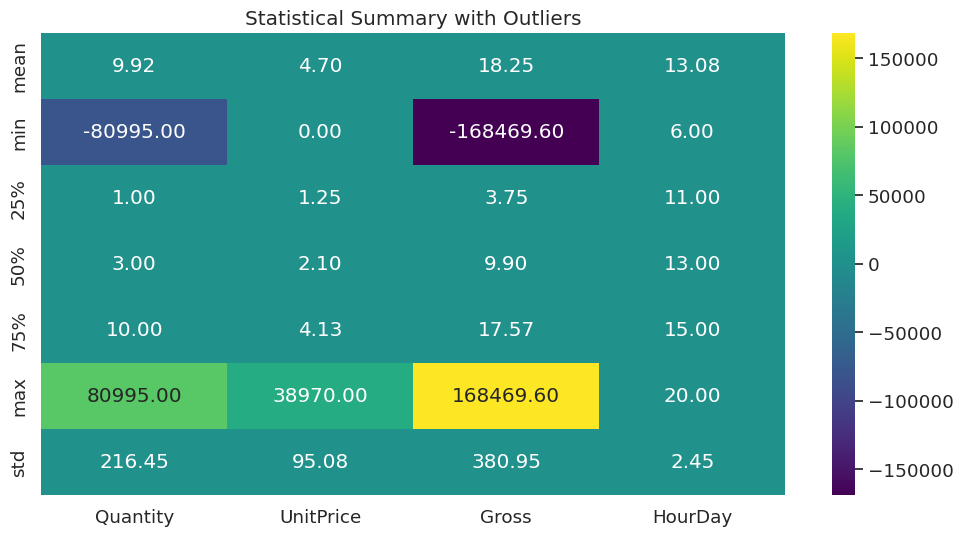

In [57]:
# Drop the "count" row from the statistical summary
summary_without_count = summary_with_outliers.drop(index='count')

# Select numerical columns for the heatmap
numerical_columns = summary_without_count.select_dtypes(include=[np.number])

# Plot the heatmap using only numerical columns
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_columns, annot=True, cmap='viridis', fmt='.2f')
plt.title('Statistical Summary with Outliers')
plt.show()

Statistical summary of data without outliers

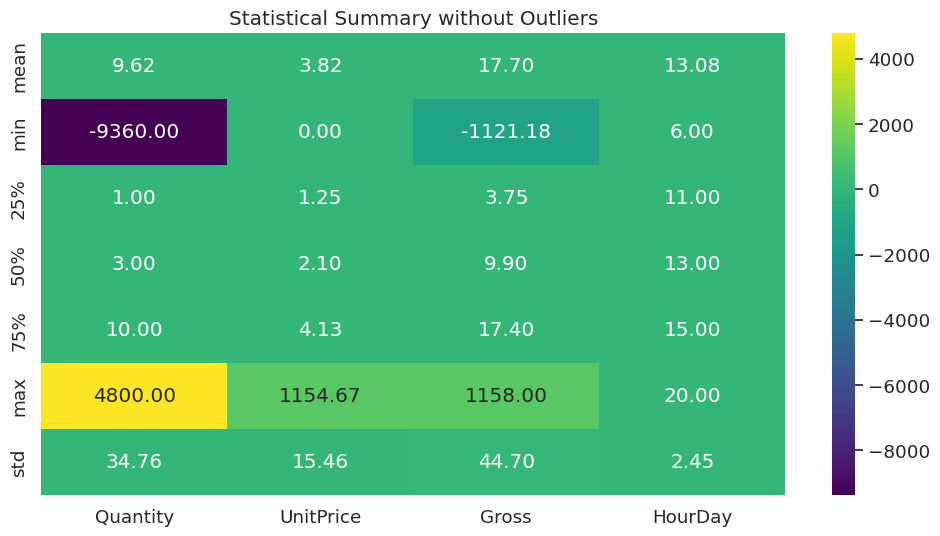

In [58]:
# Drop the "count" row from the statistical summary
summary_without_count = summary_without_outliers.drop(index='count')

# Select numerical columns for the heatmap
numerical_columns = summary_without_count.select_dtypes(include=[np.number])

# Plot the heatmap using only numerical columns
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_columns, annot=True, cmap='viridis', fmt='.2f')
plt.title('Statistical Summary without Outliers')
plt.show()

# **summarize**

In this analysis, we conducted several steps to clean, transform, analyze, and visualize the online retail data. Here’s a summary of what we accomplished:

**Data Preparation and Cleaning**

1. Loaded Data:

    . Imported the dataset and converted relevant columns to appropriate data types for analysis.

2. Handled Missing Values:

    .Filtered out rows where CustomerID or State were marked as "Unknown".

3. Created New Features:

    .Added MonthYear, Weekday, and HourDay columns to provide time-based features for analysis.

**Aggregations and Groupings**
4. Order and Customer Analysis:

    . Calculated the number of completed and returned orders.

    . Grouped data by Country to get the unique number of customers (CustomerID) and the number of unique invoices (InvoiceNo).

    . Grouped data by CustomerID to compute total purchases and total gross revenue per customer.

    . Identified the top 50 customers based on total purchases and gross revenue.

5. Product and Category Analysis:

    . Grouped data by Description to get the total purchases and total gross revenue per product category.

    . Identified the top 20 categories based on total gross revenue.

6. Time-Based Analysis:

    . Grouped data by MonthYear to analyze monthly trends in orders and gross revenue.

    . Grouped data by Weekday to understand daily trends.

    . Grouped data by HourDay to study hourly trends in gross revenue.

**Outlier Detection and Removal**

7. Outlier Detection:

    . Used the Z-score method to identify outliers in the Gross revenue data.

    . Removed rows identified as outliers to create a dataset without outliers for further analysis.

8. Statistical Summaries:

    . Generated descriptive statistics for the dataset with and without outliers to compare the impact of outlier removal.

**Visualization**

9. Heatmaps:

    . Created heatmaps to visualize the statistical summaries of data with and without outliers.

10. Radar Chart:

    . Constructed a radar chart to compare monthly
    orders and logarithmic gross revenue, adjusting for the large discrepancy in scale between the two metrics.

    . Rotated the radar chart by some degrees to improve readability.

**Conclusions**

. Customer Insights:

    . Identified top customers who contribute
    significantly to the total gross revenue, highlighting the importance of
    customer segmentation and targeted marketing.

. Product Insights:

    . Determined top-selling product categories,
    which can guide inventory management and promotional strategies.

. Time-Based Insights:

    . Uncovered monthly, daily, and hourly trends in orders and revenue,
    which can inform timing for marketing campaigns and stock management.

. Outlier Impact:

    . Highlighted the importance of outlier detection and removal
    to provide a clearer view of the data distribution and central tendencies.

. Visualization:

    . Effective visualizations were created to facilitate the understanding of complex datasets,
    making it easier to derive actionable business insights.

This comprehensive analysis helps in understanding customer behavior, optimizing product offerings, and making data-driven decisions to enhance business performance.